<a href="https://colab.research.google.com/github/yeeh-l/Tensorflow/blob/master/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H3>資二_B0729066_20200728

<H2> Training:
<H3> dataset: Cifar 10

170500096/170498071 [==============================] - 11s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
______________________________________________________

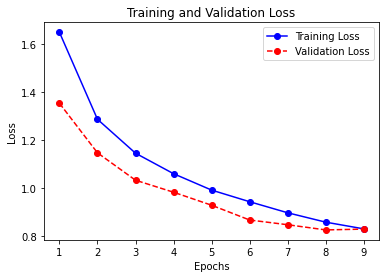

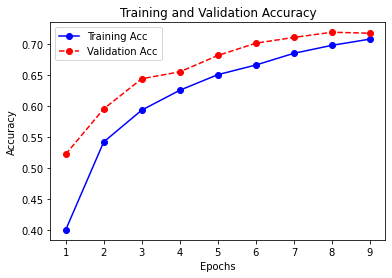

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型 Conv2D - Pool - Dropout - Dense
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
                 input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=9, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 儲存Keras模型
#print("Saving Model: cifar10.h5 ...")
#model.save("cifar10.h5")
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


<H2>Show Pic : 

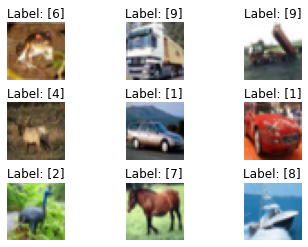

In [11]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
# 載入 Cifar10 資料集, 如果是第一次載入會自行下載資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 繪出9張圖片
sub_plot= 330
for i in range(0, 9):
    ax = plt.subplot(sub_plot+i+1)
    ax.imshow(X_train[i], cmap="binary")
    ax.set_title("Label: " + str(Y_train[i]))
    ax.axis("off")

plt.subplots_adjust(hspace = .4)
# 顯示數字圖片
plt.show()

[]

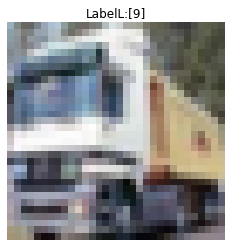

In [15]:
plt.imshow(X_train[1],cmap='binary')
plt.title("LabelL:"+str(Y_train[1]))
plt.axis('off')

plt.plot()

<H3>
#0 airplane<BR>
#1 car<BR>
#2 bird<BR>
#3 cat<BR>
#4 deer<BR>
#5 dog<BR>
#6 frog<BR>
#7 horse<BR>
#8 ship<BR>
#9 truck<BR>


<H2>Predict:

In [19]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
Y_test_bk = Y_test.copy()   # 備份 Y_test 資料集
Y_pred = model.predict_classes(X_test)
# 顯示混淆矩陣
tb = pd.crosstab(Y_test_bk.astype(int).flatten(), 
                 Y_pred.astype(int),
                 rownames=["label"], colnames=["predict"])
print(tb)

#0 airplane
#1 car
#2 bird
#3 cat
#4 deer
#5 dog
#6 frog
#7 horse
#8 ship
#9 truck

predict    0    1    2    3   4    5    6    7    8    9
label                                                   
0        910    9    5   12   0    3    0   13   26   22
1        112  774    3    5   0    5    0    3   46   52
2        303   18  296   86   3  140   12   93   25   24
3        206   22   32  351   1  245   11   66   43   23
4        301    9   88  124  77  116   17  222   30   16
5        103    9   28  127   1  599    4   85   27   17
6        127   20   65  136   1   94  416   30   84   27
7         89    4    8   18   2   82    0  760   11   26
8        308   41    0    7   1    3    0   10  598   32
9        141  117    1   10   0    4    1   15   27  684


<H2> Final Test:

Predicting ...


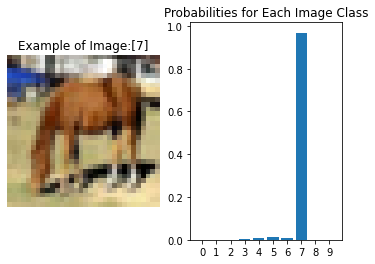

In [21]:
 i = np.random.randint(0, len(X_test))
img = X_test[i]
# 將圖片轉換成 4D 張量
X_test_img = img.reshape(1, 32, 32, 3).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test_img = X_test_img / 255
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("cifar10.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Image:" + str(Y_test[i]))
plt.imshow(img, cmap="binary")
plt.axis("off")
# 預測結果的機率
print("Predicting ...")
probs = model.predict_proba(X_test_img, batch_size=1)
plt.subplot(1,2,2)
plt.title("Probabilities for Each Image Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()